# TP 2 Descente du Gradient
Dans ce TP, nous aimerions prédire le bénéfice d'une entreprise dans plusieurs ville en nous basant sur les habitant de cette ville.

Pour ce faire, nous étudierons un ensemble de données avec le bénéfice (y) et les caractéristiques des habitants (X).

La prédiction se fera avec l'agorithme de descente du gradient.

LES BINOMES:
NOM	    PRENOM	         MATRICULLE 	GROUPE

BELIMI	Ibrahim Sabri	161631074255	A1 TP1

ARAB 	MAHER 	        171731045353   	A1 TP1

ZAIT 	Fouad  	        181831072145  	A1 TP1

ASMA	SRAOUIA	        161631102642    A1 TP1


# Importation des librairies necessaires au travail

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [170]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=int)
data.shape

(97, 2)

Dans ces données (data), la première colonne represente la première caractéristique (la population d'une ville x1000), la deuxieme colonne represente le bénéfice (x1000).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [171]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0]))
y = data[:, 1];

Text(0, 0.5, 'Bénéfice x1000')

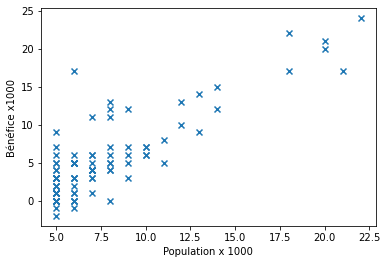

In [167]:
# traçons ces données pour visualisation
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Bénéfice x1000')

# Descente du Gradient : Préparation des fonctions

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [7]:
def computeCostNonVect(X, y, theta):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
    
    # calculer le coût avec et sans vectorisation, 
    # comparer le temps de traitement
    j=0
    for i in range(len(X)):
        j=j+(((theta[0]*X[i,0])+(theta[1]*X[i,1]))-y[i])**2
    j=j/(2*(len(X)))
    return j
print(computeCostNonVect(X, y, theta))
    

[29.25773196]


In [8]:
def computeCost(X, y, theta):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
    
    # calculer le coût avec et sans vectorisation, 
    # comparer le temps de traitement
    cost=(1/(2*len(y)))*np.sum(np.square(X.dot(theta)-y.reshape(97,1)))
    return cost
print(computeCost(X, y, theta))
    
  

29.257731958762886


2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [152]:
all_t0=[]
all_t1=[]
all_costs=[]
def j(t0,t1,X,y):
    j1=0
    j0=0
    j=[]
    for i in range(len(X)):
        j1=j1+(((t0*X[i,0])+(t1*X[i,1]))-y[i])*X[i,1]
        j0=j0+(((t0*X[i,0])+(t1*X[i,1]))-y[i])
    j1=j1/(len(X))
    j0=j0/(len(X))
    j.append(j0)
    j.append(j1)
    return j
    
def gradientDescent(X, y, theta, alpha, iterations):
    # garder aussi le cout à chaque itération 
    # pour afficher le coût en fonction de theta0 et theta1
    i=0
    while(i<iterations):
        jd=[]
        t0=theta[0]
        t1=theta[1]
        jd=j(t0,t1,X,y)
        print(jd)
        theta[0][0]=theta[0][0]-alpha*jd[0]
        all_t0.append(theta[0][0])
        theta[1][0]=theta[1][0]-alpha*jd[1]
        all_t1.append(theta[1][0])
        all_costs.append(computeCost(X, y, theta))
        i=i+1
        print("t0=",theta[0])
        print("t1=",theta[1])
    return theta
print(gradientDescent(X, y, theta, alpha, iterations))
print(all_t0)
print(all_t1)
print(all_costs)

[array([-5.40206186]), array([-59.1443299])]
t0= [0.05402062]
t1= [0.5914433]
[array([-0.78112339]), array([-14.82015836])]
t0= [0.06183185]
t1= [0.73964488]
[array([0.37104852]), array([-3.75778498])]
t0= [0.05812137]
t1= [0.77722273]
[array([0.65750102]), array([-0.99676495])]
t0= [0.05154636]
t1= [0.78719038]
[array([0.72789271]), array([-0.30756535])]
t0= [0.04426743]
t1= [0.79026604]
[array([0.7443629]), array([-0.13544304])]
t0= [0.0368238]
t1= [0.79162047]
[array([0.74737771]), array([-0.09237113])]
t0= [0.02935002]
t1= [0.79254418]
[array([0.7470365]), array([-0.08150736])]
t0= [0.02187966]
t1= [0.79335925]
[array([0.74585985]), array([-0.07868219])]
t0= [0.01442106]
t1= [0.79414607]
[array([0.74447682]), array([-0.07786349])]
t0= [0.00697629]
t1= [0.79492471]
[array([0.74304439]), array([-0.07754577])]
t0= [-0.00045415]
t1= [0.79570017]
[array([0.74160176]), array([-0.07735331])]
t0= [-0.00787017]
t1= [0.7964737]
[array([0.7401587]), array([-0.07719233])]
t0= [-0.01527176]
t1=

[array([0.48866589]), array([-0.05096145])]
t0= [-1.30423237]
t1= [0.93166733]
[array([0.4877143]), array([-0.05086221])]
t0= [-1.30910952]
t1= [0.93217595]
[array([0.48676456]), array([-0.05076316])]
t0= [-1.31397716]
t1= [0.93268358]
[array([0.48581666]), array([-0.05066431])]
t0= [-1.31883533]
t1= [0.93319022]
[array([0.48487062]), array([-0.05056565])]
t0= [-1.32368404]
t1= [0.93369588]
[array([0.48392641]), array([-0.05046718])]
t0= [-1.3285233]
t1= [0.93420055]
[array([0.48298405]), array([-0.0503689])]
t0= [-1.33335314]
t1= [0.93470424]
[array([0.48204352]), array([-0.05027082])]
t0= [-1.33817358]
t1= [0.93520695]
[array([0.48110482]), array([-0.05017292])]
t0= [-1.34298462]
t1= [0.93570868]
[array([0.48016795]), array([-0.05007522])]
t0= [-1.3477863]
t1= [0.93620943]
[array([0.4792329]), array([-0.04997771])]
t0= [-1.35257863]
t1= [0.93670921]
[array([0.47829968]), array([-0.04988039])]
t0= [-1.35736163]
t1= [0.93720801]
[array([0.47736827]), array([-0.04978325])]
t0= [-1.36213

[array([0.39359184]), array([-0.04104647])]
t0= [-1.7915089]
t1= [0.98248388]
[array([0.39282538]), array([-0.04096654])]
t0= [-1.79543715]
t1= [0.98289354]
[array([0.39206042]), array([-0.04088676])]
t0= [-1.79935775]
t1= [0.98330241]
[array([0.39129695]), array([-0.04080714])]
t0= [-1.80327072]
t1= [0.98371048]
[array([0.39053496]), array([-0.04072768])]
t0= [-1.80717607]
t1= [0.98411776]
[array([0.38977446]), array([-0.04064837])]
t0= [-1.81107382]
t1= [0.98452424]
[array([0.38901544]), array([-0.04056921])]
t0= [-1.81496397]
t1= [0.98492994]
[array([0.3882579]), array([-0.04049021])]
t0= [-1.81884655]
t1= [0.98533484]
[array([0.38750183]), array([-0.04041136])]
t0= [-1.82272157]
t1= [0.98573895]
[array([0.38674724]), array([-0.04033267])]
t0= [-1.82658904]
t1= [0.98614228]
[array([0.38599411]), array([-0.04025413])]
t0= [-1.83044898]
t1= [0.98654482]
[array([0.38524245]), array([-0.04017574])]
t0= [-1.83430141]
t1= [0.98694658]
[array([0.38449226]), array([-0.0400975])]
t0= [-1.838

t1= [1.02765338]
[array([0.30848111]), array([-0.03217054])]
t0= [-2.22772104]
t1= [1.02797509]
[array([0.3078804]), array([-0.03210789])]
t0= [-2.23079985]
t1= [1.02829617]
[array([0.30728085]), array([-0.03204536])]
t0= [-2.23387266]
t1= [1.02861662]
[array([0.30668247]), array([-0.03198296])]
t0= [-2.23693948]
t1= [1.02893645]
[array([0.30608526]), array([-0.03192068])]
t0= [-2.24000033]
t1= [1.02925566]
[array([0.30548921]), array([-0.03185852])]
t0= [-2.24305523]
t1= [1.02957424]
[array([0.30489432]), array([-0.03179648])]
t0= [-2.24610417]
t1= [1.02989221]
[array([0.30430059]), array([-0.03173456])]
t0= [-2.24914718]
t1= [1.03020955]
[array([0.30370802]), array([-0.03167276])]
t0= [-2.25218426]
t1= [1.03052628]
[array([0.3031166]), array([-0.03161109])]
t0= [-2.25521542]
t1= [1.03084239]
[array([0.30252633]), array([-0.03154953])]
t0= [-2.25824068]
t1= [1.03115788]
[array([0.30193721]), array([-0.03148809])]
t0= [-2.26126006]
t1= [1.03147277]
[array([0.30134924]), array([-0.03142

t0= [-2.53780488]
t1= [1.06031277]
[array([0.24749678]), array([-0.02581067])]
t0= [-2.54027985]
t1= [1.06057087]
[array([0.24701482]), array([-0.02576041])]
t0= [-2.54275]
t1= [1.06082848]
[array([0.2465338]), array([-0.02571024])]
t0= [-2.54521533]
t1= [1.06108558]
[array([0.24605372]), array([-0.02566018])]
t0= [-2.54767587]
t1= [1.06134218]
[array([0.24557457]), array([-0.02561021])]
t0= [-2.55013162]
t1= [1.06159828]
[array([0.24509635]), array([-0.02556034])]
t0= [-2.55258258]
t1= [1.06185389]
[array([0.24461907]), array([-0.02551056])]
t0= [-2.55502877]
t1= [1.06210899]
[array([0.24414272]), array([-0.02546088])]
t0= [-2.5574702]
t1= [1.0623636]
[array([0.24366729]), array([-0.0254113])]
t0= [-2.55990687]
t1= [1.06261771]
[array([0.24319279]), array([-0.02536182])]
t0= [-2.5623388]
t1= [1.06287133]
[array([0.24271921]), array([-0.02531243])]
t0= [-2.56476599]
t1= [1.06312446]
[array([0.24224656]), array([-0.02526314])]
t0= [-2.56718846]
t1= [1.06337709]
[array([0.24177482]), arr

t0= [-2.9396891]
t1= [1.10222402]
[array([0.16923658]), array([-0.01764916])]
t0= [-2.94138146]
t1= [1.10240051]
[array([0.16890702]), array([-0.01761479])]
t0= [-2.94307053]
t1= [1.10257666]
[array([0.1685781]), array([-0.01758049])]
t0= [-2.94475631]
t1= [1.10275246]
[array([0.16824983]), array([-0.01754625])]
t0= [-2.94643881]
t1= [1.10292793]
[array([0.16792219]), array([-0.01751208])]
t0= [-2.94811803]
t1= [1.10310305]
[array([0.16759519]), array([-0.01747798])]
t0= [-2.94979398]
t1= [1.10327783]
[array([0.16726882]), array([-0.01744395])]
t0= [-2.95146667]
t1= [1.10345227]
[array([0.1669431]), array([-0.01740998])]
t0= [-2.9531361]
t1= [1.10362637]
[array([0.166618]), array([-0.01737607])]
t0= [-2.95480228]
t1= [1.10380013]
[array([0.16629354]), array([-0.01734224])]
t0= [-2.95646522]
t1= [1.10397355]
[array([0.16596971]), array([-0.01730846])]
t0= [-2.95812492]
t1= [1.10414663]
[array([0.16564651]), array([-0.01727476])]
t0= [-2.95978138]
t1= [1.10431938]
[array([0.16532395]), a

t0= [-3.13026774]
t1= [1.12209887]
[array([0.13212459]), array([-0.01377886])]
t0= [-3.13158899]
t1= [1.12223666]
[array([0.1318673]), array([-0.01375203])]
t0= [-3.13290766]
t1= [1.12237418]
[array([0.13161051]), array([-0.01372525])]
t0= [-3.13422377]
t1= [1.12251144]
[array([0.13135422]), array([-0.01369852])]
t0= [-3.13553731]
t1= [1.12264842]
[array([0.13109843]), array([-0.01367185])]
t0= [-3.13684829]
t1= [1.12278514]
[array([0.13084314]), array([-0.01364522])]
t0= [-3.13815673]
t1= [1.12292159]
[array([0.13058834]), array([-0.01361865])]
t0= [-3.13946261]
t1= [1.12305778]
[array([0.13033405]), array([-0.01359213])]
t0= [-3.14076595]
t1= [1.1231937]
[array([0.13008024]), array([-0.01356566])]
t0= [-3.14206675]
t1= [1.12332936]
[array([0.12982693]), array([-0.01353925])]
t0= [-3.14336502]
t1= [1.12346475]
[array([0.12957412]), array([-0.01351288])]
t0= [-3.14466076]
t1= [1.12359988]
[array([0.12932179]), array([-0.01348657])]
t0= [-3.14595398]
t1= [1.12373474]
[array([0.12906996]

[array([0.10683432]), array([-0.01114142])]
t0= [-3.26120748]
t1= [1.13575417]
[array([0.10662628]), array([-0.01111972])]
t0= [-3.26227374]
t1= [1.13586537]
[array([0.10641864]), array([-0.01109807])]
t0= [-3.26333793]
t1= [1.13597635]
[array([0.10621141]), array([-0.01107646])]
t0= [-3.26440004]
t1= [1.13608711]
[array([0.10600458]), array([-0.01105489])]
t0= [-3.26546009]
t1= [1.13619766]
[array([0.10579815]), array([-0.01103336])]
t0= [-3.26651807]
t1= [1.136308]
[array([0.10559213]), array([-0.01101187])]
t0= [-3.26757399]
t1= [1.13641811]
[array([0.10538651]), array([-0.01099043])]
t0= [-3.26862785]
t1= [1.13652802]
[array([0.10518128]), array([-0.01096903])]
t0= [-3.26967967]
t1= [1.13663771]
[array([0.10497646]), array([-0.01094767])]
t0= [-3.27072943]
t1= [1.13674719]
[array([0.10477204]), array([-0.01092635])]
t0= [-3.27177715]
t1= [1.13685645]
[array([0.10456801]), array([-0.01090507])]
t0= [-3.27282283]
t1= [1.1369655]
[array([0.10436438]), array([-0.01088384])]
t0= [-3.273

t0= [-3.4277205]
t1= [1.1531193]
[array([0.07420067]), array([-0.00773816])]
t0= [-3.4284625]
t1= [1.15319668]
[array([0.07405617]), array([-0.00772309])]
t0= [-3.42920306]
t1= [1.15327391]
[array([0.07391196]), array([-0.00770805])]
t0= [-3.42994218]
t1= [1.15335099]
[array([0.07376803]), array([-0.00769304])]
t0= [-3.43067986]
t1= [1.15342792]
[array([0.07362438]), array([-0.00767806])]
t0= [-3.43141611]
t1= [1.1535047]
[array([0.07348101]), array([-0.00766311])]
t0= [-3.43215092]
t1= [1.15358133]
[array([0.07333792]), array([-0.00764818])]
t0= [-3.4328843]
t1= [1.15365781]
[array([0.0731951]), array([-0.00763329])]
t0= [-3.43361625]
t1= [1.15373415]
[array([0.07305257]), array([-0.00761842])]
t0= [-3.43434677]
t1= [1.15381033]
[array([0.07291031]), array([-0.00760359])]
t0= [-3.43507588]
t1= [1.15388637]
[array([0.07276833]), array([-0.00758878])]
t0= [-3.43580356]
t1= [1.15396225]
[array([0.07262662]), array([-0.007574])]
t0= [-3.43652983]
t1= [1.15403799]
[array([0.0724852]), arra

[array([0.04813666]), array([-0.00502002])]
t0= [-3.56204658]
t1= [1.16712775]
[array([0.04804292]), array([-0.00501025])]
t0= [-3.56252701]
t1= [1.16717785]
[array([0.04794936]), array([-0.00500049])]
t0= [-3.5630065]
t1= [1.16722785]
[array([0.04785599]), array([-0.00499075])]
t0= [-3.56348506]
t1= [1.16727776]
[array([0.0477628]), array([-0.00498103])]
t0= [-3.56396269]
t1= [1.16732757]
[array([0.04766979]), array([-0.00497133])]
t0= [-3.56443939]
t1= [1.16737728]
[array([0.04757696]), array([-0.00496165])]
t0= [-3.56491516]
t1= [1.1674269]
[array([0.04748431]), array([-0.00495199])]
t0= [-3.56539]
t1= [1.16747642]
[array([0.04739184]), array([-0.00494235])]
t0= [-3.56586392]
t1= [1.16752584]
[array([0.04729955]), array([-0.00493272])]
t0= [-3.56633692]
t1= [1.16757517]
[array([0.04720745]), array([-0.00492312])]
t0= [-3.56680899]
t1= [1.1676244]
[array([0.04711552]), array([-0.00491353])]
t0= [-3.56728015]
t1= [1.16767354]
[array([0.04702377]), array([-0.00490396])]
t0= [-3.5677503

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [151]:
theta = np.zeros((2, 1))
print(theta)

[[0.]
 [0.]]


Calculer le cout initial

In [13]:
initialCost=computeCost(X, y, theta)

Appel des la fonction de calcul du gradient

In [21]:
# paramètres
iterations = 1500;
alpha = 0.01;
# Appel
theta = gradientDescent(X, y, theta, alpha, iterations);

[array([-5.40206186]), array([-59.1443299])]
t0= [0.05402062]
t1= [0.5914433]
[array([-0.78112339]), array([-14.82015836])]
t0= [0.06183185]
t1= [0.73964488]
[array([0.37104852]), array([-3.75778498])]
t0= [0.05812137]
t1= [0.77722273]
[array([0.65750102]), array([-0.99676495])]
t0= [0.05154636]
t1= [0.78719038]
[array([0.72789271]), array([-0.30756535])]
t0= [0.04426743]
t1= [0.79026604]
[array([0.7443629]), array([-0.13544304])]
t0= [0.0368238]
t1= [0.79162047]
[array([0.74737771]), array([-0.09237113])]
t0= [0.02935002]
t1= [0.79254418]
[array([0.7470365]), array([-0.08150736])]
t0= [0.02187966]
t1= [0.79335925]
[array([0.74585985]), array([-0.07868219])]
t0= [0.01442106]
t1= [0.79414607]
[array([0.74447682]), array([-0.07786349])]
t0= [0.00697629]
t1= [0.79492471]
[array([0.74304439]), array([-0.07754577])]
t0= [-0.00045415]
t1= [0.79570017]
[array([0.74160176]), array([-0.07735331])]
t0= [-0.00787017]
t1= [0.7964737]
[array([0.7401587]), array([-0.07719233])]
t0= [-0.01527176]
t1=

t0= [-0.81814218]
t1= [0.88097449]
[array([0.58237219]), array([-0.06073378])]
t0= [-0.82396591]
t1= [0.88158183]
[array([0.58123812]), array([-0.06061552])]
t0= [-0.82977829]
t1= [0.88218799]
[array([0.58010626]), array([-0.06049748])]
t0= [-0.83557935]
t1= [0.88279296]
[array([0.5789766]), array([-0.06037967])]
t0= [-0.84136912]
t1= [0.88339676]
[array([0.57784914]), array([-0.06026209])]
t0= [-0.84714761]
t1= [0.88399938]
[array([0.57672388]), array([-0.06014474])]
t0= [-0.85291485]
t1= [0.88460082]
[array([0.5756008]), array([-0.06002762])]
t0= [-0.85867085]
t1= [0.8852011]
[array([0.57447992]), array([-0.05991072])]
t0= [-0.86441565]
t1= [0.88580021]
[array([0.57336121]), array([-0.05979406])]
t0= [-0.87014926]
t1= [0.88639815]
[array([0.57224469]), array([-0.05967762])]
t0= [-0.87587171]
t1= [0.88699493]
[array([0.57113034]), array([-0.05956141])]
t0= [-0.88158302]
t1= [0.88759054]
[array([0.57001816]), array([-0.05944542])]
t0= [-0.8872832]
t1= [0.88818499]
[array([0.56890814]),

[array([0.4296753]), array([-0.0448095])]
t0= [-1.60657282]
t1= [0.96319747]
[array([0.42883857]), array([-0.04472224])]
t0= [-1.61086121]
t1= [0.96364469]
[array([0.42800348]), array([-0.04463515])]
t0= [-1.61514124]
t1= [0.96409104]
[array([0.42717002]), array([-0.04454823])]
t0= [-1.61941294]
t1= [0.96453653]
[array([0.42633818]), array([-0.04446148])]
t0= [-1.62367633]
t1= [0.96498114]
[array([0.42550796]), array([-0.0443749])]
t0= [-1.62793141]
t1= [0.96542489]
[array([0.42467935]), array([-0.04428849])]
t0= [-1.6321782]
t1= [0.96586778]
[array([0.42385236]), array([-0.04420224])]
t0= [-1.63641672]
t1= [0.9663098]
[array([0.42302698]), array([-0.04411617])]
t0= [-1.64064699]
t1= [0.96675096]
[array([0.4222032]), array([-0.04403026])]
t0= [-1.64486903]
t1= [0.96719126]
[array([0.42138103]), array([-0.04394452])]
t0= [-1.64908284]
t1= [0.96763071]
[array([0.42056046]), array([-0.04385894])]
t0= [-1.65328844]
t1= [0.9680693]
[array([0.41974149]), array([-0.04377353])]
t0= [-1.6574858

t0= [-2.12267929]
t1= [1.01702061]
[array([0.32833551]), array([-0.03424109])]
t0= [-2.12596265]
t1= [1.01736302]
[array([0.32769613]), array([-0.03417441])]
t0= [-2.12923961]
t1= [1.01770476]
[array([0.327058]), array([-0.03410786])]
t0= [-2.13251019]
t1= [1.01804584]
[array([0.32642111]), array([-0.03404144])]
t0= [-2.1357744]
t1= [1.01838626]
[array([0.32578546]), array([-0.03397515])]
t0= [-2.13903225]
t1= [1.01872601]
[array([0.32515105]), array([-0.03390899])]
t0= [-2.14228376]
t1= [1.0190651]
[array([0.32451787]), array([-0.03384296])]
t0= [-2.14552894]
t1= [1.01940353]
[array([0.32388593]), array([-0.03377706])]
t0= [-2.1487678]
t1= [1.0197413]
[array([0.32325521]), array([-0.03371128])]
t0= [-2.15200035]
t1= [1.02007841]
[array([0.32262573]), array([-0.03364563])]
t0= [-2.15522661]
t1= [1.02041487]
[array([0.32199747]), array([-0.03358011])]
t0= [-2.15844659]
t1= [1.02075067]
[array([0.32137043]), array([-0.03351472])]
t0= [-2.16166029]
t1= [1.02108582]
[array([0.32074462]), a

t0= [-2.52535742]
t1= [1.05901466]
[array([0.24992071]), array([-0.02606345])]
t0= [-2.52785663]
t1= [1.05927529]
[array([0.24943403]), array([-0.0260127])]
t0= [-2.53035097]
t1= [1.05953542]
[array([0.2489483]), array([-0.02596204])]
t0= [-2.53284045]
t1= [1.05979504]
[array([0.24846352]), array([-0.02591149])]
t0= [-2.53532508]
t1= [1.06005415]
[array([0.24797968]), array([-0.02586103])]
t0= [-2.53780488]
t1= [1.06031277]
[array([0.24749678]), array([-0.02581067])]
t0= [-2.54027985]
t1= [1.06057087]
[array([0.24701482]), array([-0.02576041])]
t0= [-2.54275]
t1= [1.06082848]
[array([0.2465338]), array([-0.02571024])]
t0= [-2.54521533]
t1= [1.06108558]
[array([0.24605372]), array([-0.02566018])]
t0= [-2.54767587]
t1= [1.06134218]
[array([0.24557457]), array([-0.02561021])]
t0= [-2.55013162]
t1= [1.06159828]
[array([0.24509635]), array([-0.02556034])]
t0= [-2.55258258]
t1= [1.06185389]
[array([0.24461907]), array([-0.02551056])]
t0= [-2.55502877]
t1= [1.06210899]
[array([0.24414272]), a

t0= [-2.8488541]
t1= [1.09275112]
[array([0.18692517]), array([-0.01949384])]
t0= [-2.85072335]
t1= [1.09294606]
[array([0.18656116]), array([-0.01945588])]
t0= [-2.85258896]
t1= [1.09314062]
[array([0.18619787]), array([-0.019418])]
t0= [-2.85445094]
t1= [1.0933348]
[array([0.18583528]), array([-0.01938018])]
t0= [-2.85630929]
t1= [1.0935286]
[array([0.1854734]), array([-0.01934244])]
t0= [-2.85816403]
t1= [1.09372202]
[array([0.18511222]), array([-0.01930478])]
t0= [-2.86001515]
t1= [1.09391507]
[array([0.18475174]), array([-0.01926718])]
t0= [-2.86186267]
t1= [1.09410774]
[array([0.18439197]), array([-0.01922966])]
t0= [-2.86370659]
t1= [1.09430004]
[array([0.1840329]), array([-0.01919222])]
t0= [-2.86554692]
t1= [1.09449196]
[array([0.18367452]), array([-0.01915484])]
t0= [-2.86738366]
t1= [1.09468351]
[array([0.18331685]), array([-0.01911754])]
t0= [-2.86921683]
t1= [1.09487469]
[array([0.18295987]), array([-0.01908032])]
t0= [-2.87104643]
t1= [1.09506549]
[array([0.18260359]), ar

[array([0.14909708]), array([-0.01554887])]
t0= [-3.04460106]
t1= [1.11316496]
[array([0.14880674]), array([-0.01551859])]
t0= [-3.04608913]
t1= [1.11332015]
[array([0.14851696]), array([-0.01548837])]
t0= [-3.0475743]
t1= [1.11347503]
[array([0.14822775]), array([-0.01545821])]
t0= [-3.04905657]
t1= [1.11362961]
[array([0.1479391]), array([-0.01542811])]
t0= [-3.05053596]
t1= [1.11378389]
[array([0.14765102]), array([-0.01539807])]
t0= [-3.05201247]
t1= [1.11393788]
[array([0.14736349]), array([-0.01536808])]
t0= [-3.05348611]
t1= [1.11409156]
[array([0.14707652]), array([-0.01533815])]
t0= [-3.05495687]
t1= [1.11424494]
[array([0.14679012]), array([-0.01530828])]
t0= [-3.05642478]
t1= [1.11439802]
[array([0.14650427]), array([-0.01527847])]
t0= [-3.05788982]
t1= [1.11455081]
[array([0.14621898]), array([-0.01524872])]
t0= [-3.05935201]
t1= [1.11470329]
[array([0.14593424]), array([-0.01521903])]
t0= [-3.06081135]
t1= [1.11485548]
[array([0.14565006]), array([-0.01518939])]
t0= [-3.06

[array([0.11151536]), array([-0.01162959])]
t0= [-3.23721609]
t1= [1.13325218]
[array([0.1112982]), array([-0.01160694])]
t0= [-3.23832907]
t1= [1.13336825]
[array([0.11108146]), array([-0.01158434])]
t0= [-3.23943989]
t1= [1.1334841]
[array([0.11086515]), array([-0.01156178])]
t0= [-3.24054854]
t1= [1.13359971]
[array([0.11064926]), array([-0.01153927])]
t0= [-3.24165503]
t1= [1.13371511]
[array([0.11043379]), array([-0.0115168])]
t0= [-3.24275937]
t1= [1.13383028]
[array([0.11021874]), array([-0.01149437])]
t0= [-3.24386156]
t1= [1.13394522]
[array([0.11000411]), array([-0.01147199])]
t0= [-3.2449616]
t1= [1.13405994]
[array([0.10978989]), array([-0.01144965])]
t0= [-3.2460595]
t1= [1.13417444]
[array([0.10957609]), array([-0.01142735])]
t0= [-3.24715526]
t1= [1.13428871]
[array([0.10936271]), array([-0.0114051])]
t0= [-3.24824888]
t1= [1.13440276]
[array([0.10914975]), array([-0.01138289])]
t0= [-3.24934038]
t1= [1.13451659]
[array([0.1089372]), array([-0.01136072])]
t0= [-3.2504297

t0= [-3.37877309]
t1= [1.14801472]
[array([0.08373235]), array([-0.00873219])]
t0= [-3.37961041]
t1= [1.14810204]
[array([0.0835693]), array([-0.00871518])]
t0= [-3.3804461]
t1= [1.1481892]
[array([0.08340656]), array([-0.00869821])]
t0= [-3.38128017]
t1= [1.14827618]
[array([0.08324414]), array([-0.00868127])]
t0= [-3.38211261]
t1= [1.14836299]
[array([0.08308203]), array([-0.00866437])]
t0= [-3.38294343]
t1= [1.14844964]
[array([0.08292025]), array([-0.00864749])]
t0= [-3.38377263]
t1= [1.14853611]
[array([0.08275877]), array([-0.00863066])]
t0= [-3.38460022]
t1= [1.14862242]
[array([0.08259761]), array([-0.00861385])]
t0= [-3.3854262]
t1= [1.14870856]
[array([0.08243677]), array([-0.00859707])]
t0= [-3.38625057]
t1= [1.14879453]
[array([0.08227624]), array([-0.00858033])]
t0= [-3.38707333]
t1= [1.14888033]
[array([0.08211602]), array([-0.00856362])]
t0= [-3.38789449]
t1= [1.14896597]
[array([0.08195611]), array([-0.00854695])]
t0= [-3.38871405]
t1= [1.14905143]
[array([0.08179652]),

[array([0.06287122]), array([-0.00655664])]
t0= [-3.48652852]
t1= [1.1592522]
[array([0.06274879]), array([-0.00654388])]
t0= [-3.48715601]
t1= [1.15931764]
[array([0.0626266]), array([-0.00653113])]
t0= [-3.48778228]
t1= [1.15938295]
[array([0.06250464]), array([-0.00651841])]
t0= [-3.48840732]
t1= [1.15944814]
[array([0.06238293]), array([-0.00650572])]
t0= [-3.48903115]
t1= [1.15951319]
[array([0.06226145]), array([-0.00649305])]
t0= [-3.48965377]
t1= [1.15957812]
[array([0.0621402]), array([-0.00648041])]
t0= [-3.49027517]
t1= [1.15964293]
[array([0.06201919]), array([-0.00646779])]
t0= [-3.49089536]
t1= [1.15970761]
[array([0.06189842]), array([-0.00645519])]
t0= [-3.49151435]
t1= [1.15977216]
[array([0.06177789]), array([-0.00644262])]
t0= [-3.49213212]
t1= [1.15983658]
[array([0.06165758]), array([-0.00643008])]
t0= [-3.4927487]
t1= [1.15990089]
[array([0.06153752]), array([-0.00641756])]
t0= [-3.49336408]
t1= [1.15996506]
[array([0.06141768]), array([-0.00640506])]
t0= [-3.4939

t0= [-3.55323678]
t1= [1.166209]
[array([0.04975848]), array([-0.00518916])]
t0= [-3.55373436]
t1= [1.16626089]
[array([0.04966158]), array([-0.00517905])]
t0= [-3.55423098]
t1= [1.16631268]
[array([0.04956487]), array([-0.00516897])]
t0= [-3.55472663]
t1= [1.16636437]
[array([0.04946836]), array([-0.0051589])]
t0= [-3.55522131]
t1= [1.16641596]
[array([0.04937202]), array([-0.00514885])]
t0= [-3.55571503]
t1= [1.16646745]
[array([0.04927588]), array([-0.00513883])]
t0= [-3.55620779]
t1= [1.16651884]
[array([0.04917992]), array([-0.00512882])]
t0= [-3.55669959]
t1= [1.16657012]
[array([0.04908415]), array([-0.00511883])]
t0= [-3.55719043]
t1= [1.16662131]
[array([0.04898857]), array([-0.00510887])]
t0= [-3.55768032]
t1= [1.1666724]
[array([0.04889317]), array([-0.00509892])]
t0= [-3.55816925]
t1= [1.16672339]
[array([0.04879796]), array([-0.00508899])]
t0= [-3.55865723]
t1= [1.16677428]
[array([0.04870294]), array([-0.00507908])]
t0= [-3.55914426]
t1= [1.16682507]
[array([0.0486081]), 

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

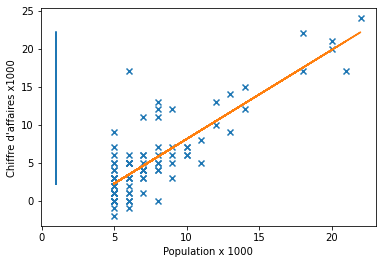

In [26]:
y_pred=np.matmul(X,theta)
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X,y_pred)
# la ligne du graphe represente le traçage de la fonction hypothèse
# la ligne devrait se rapprocher des données après entrainement avec la descente du gredient

Traçage du coût en fonction de theta0 et theta1

C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_996/2358853275.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')  # Affichage en 3D


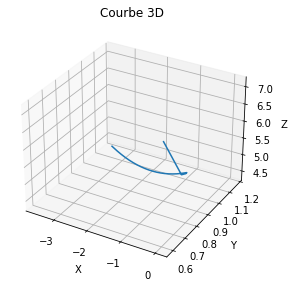

In [27]:
fig = plt.figure()
ax = fig.gca(projection='3d')  # Affichage en 3D
ax.plot(all_t0, all_t1, all_costs, label='Courbe')  # Tracé de la courbe 3D
plt.title("Courbe 3D")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.tight_layout()
plt.show()

Prédire des valeurs de y

In [28]:
# Predire pour une opulation = 35,000 et 70,000
predict1 = np.matmul([1, 3.5],theta);
predict1

array([0.49898053])

In [29]:
predict2 = np.matmul([1, 7],theta);
predict2

array([4.59767717])

# Régression linéaire à plusieurs variables

Proposer, l'aide des fonctions définies precedemment, une regression linéaire lorsque le nombre de descripeurs est supérieur à 1, en utilisant la base d'apprentissage suivante

In [135]:
# données
dataMulti = np.genfromtxt('dataMulti.csv', delimiter=',', dtype=int)
dataMulti.shape

(47, 3)

Pour cette ensemble de données, nous voudrions prédire le prix d'une maison (3ème colonne de dataMulti) à partir de :
- sa supérficie (1ère colonne)
- son nombre de chambres (2ème colonne)

In [157]:
# d'abord créer X et y
intercept=np.ones((dataMulti.shape[0],1))
X=np.column_stack((intercept,dataMulti[:,1],dataMulti[:,2]))
print(X)
y = dataMulti[:, 2]
print(y)

[[1.000e+00 3.000e+00 3.999e+05]
 [1.000e+00 3.000e+00 3.299e+05]
 [1.000e+00 3.000e+00 3.690e+05]
 [1.000e+00 2.000e+00 2.320e+05]
 [1.000e+00 4.000e+00 5.399e+05]
 [1.000e+00 4.000e+00 2.999e+05]
 [1.000e+00 3.000e+00 3.149e+05]
 [1.000e+00 3.000e+00 1.990e+05]
 [1.000e+00 3.000e+00 2.120e+05]
 [1.000e+00 3.000e+00 2.425e+05]
 [1.000e+00 4.000e+00 2.400e+05]
 [1.000e+00 3.000e+00 3.470e+05]
 [1.000e+00 3.000e+00 3.300e+05]
 [1.000e+00 5.000e+00 6.999e+05]
 [1.000e+00 3.000e+00 2.599e+05]
 [1.000e+00 4.000e+00 4.499e+05]
 [1.000e+00 2.000e+00 2.999e+05]
 [1.000e+00 3.000e+00 1.999e+05]
 [1.000e+00 4.000e+00 5.000e+05]
 [1.000e+00 4.000e+00 5.990e+05]
 [1.000e+00 3.000e+00 2.529e+05]
 [1.000e+00 2.000e+00 2.550e+05]
 [1.000e+00 3.000e+00 2.429e+05]
 [1.000e+00 4.000e+00 2.599e+05]
 [1.000e+00 3.000e+00 5.739e+05]
 [1.000e+00 3.000e+00 2.499e+05]
 [1.000e+00 3.000e+00 4.645e+05]
 [1.000e+00 3.000e+00 4.690e+05]
 [1.000e+00 3.000e+00 4.750e+05]
 [1.000e+00 3.000e+00 2.999e+05]
 [1.000e+0

In [164]:
theta = np.zeros((X.shape[1], 1))
# redéfinissez vos fonctions de coût si cela est necessaire
def computeCostNonVectt(X, y, theta):
    jt=0
    for i in range(len(X)):
        j=0
        for k in range(X.shape[1]):
            j=j+theta[k][0]*X[i,k]
        j=j-y[i]
        j=j**2
        jt=jt+j
    jt=jt/(2*(len(X)))
    return jt
print(computeCostNonVectt(X, y, theta))

65591585744.680855


Mise à l'échelle des données

In [172]:
print(X)
def mis(X):
    xms=[]
    for j in range(1,(X.shape[1])):
        print(j)
        for i in range(len(X)):
            X[i,j]=(X[i,j]-np.amin(X[:,j]))/(np.amax(X[:,j])-np.amin(X[:,j]))
mis(X)
print(X)

[[ 1.  6.]
 [ 1.  5.]
 [ 1.  8.]
 [ 1.  7.]
 [ 1.  5.]
 [ 1.  8.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  6.]
 [ 1.  5.]
 [ 1.  5.]
 [ 1. 14.]
 [ 1.  5.]
 [ 1.  8.]
 [ 1.  5.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  6.]
 [ 1. 20.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  5.]
 [ 1. 18.]
 [ 1. 12.]
 [ 1. 10.]
 [ 1. 13.]
 [ 1. 22.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  9.]
 [ 1.  5.]
 [ 1.  8.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  5.]
 [ 1. 12.]
 [ 1.  6.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1. 11.]
 [ 1.  5.]
 [ 1.  7.]
 [ 1.  7.]
 [ 1.  5.]
 [ 1.  5.]
 [ 1. 11.]
 [ 1.  5.]
 [ 1.  7.]
 [ 1.  5.]
 [ 1.  7.]
 [ 1.  7.]
 [ 1.  6.]
 [ 1.  6.]
 [ 1.  6.]
 [ 1.  5.]
 [ 1.  9.]
 [ 1.  9.]
 [ 1.  8.]
 [ 1.  5.]
 [ 1. 21.]
 [ 1. 14.]
 [ 1. 18.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1. 10.]
 [ 1.  5.]
 [ 1. 20.]
 [ 1. 10.]
 [ 1.  7.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  5.]
 [ 1. 10.]
 [ 1.  5.]
 [ 1.  5.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  9.]
 [ 1.  6.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1.  6.]
 [ 1.  5.]
 [ 1.  5.]
 [ 1.  5.]

Normalisation des données en moyenne = 0

In [173]:
print(X)
def normalisation(X):
    xms=[]
    for j in range(1,(X.shape[1])):
        print(j)
        for i in range(len(X)):
            X[i,j]=(X[i,j])/(np.amax(X[:,j])-np.amin(X[:,j]))
normalisation(X)
print(X)

[[1.         0.05882353]
 [1.         0.22520107]
 [1.         0.36193029]
 [1.         0.31635389]
 [1.         0.22520107]
 [1.         0.36193029]
 [1.         0.31635389]
 [1.         0.36193029]
 [1.         0.27077748]
 [1.         0.22520107]
 [1.         0.22520107]
 [1.         0.63538874]
 [1.         0.22520107]
 [1.         0.36193029]
 [1.         0.22520107]
 [1.         0.22520107]
 [1.         0.27077748]
 [1.         0.22520107]
 [1.         0.27077748]
 [1.         0.31635389]
 [1.         0.27077748]
 [1.         0.90884718]
 [1.         0.22520107]
 [1.         0.27077748]
 [1.         0.22520107]
 [1.         0.81769437]
 [1.         0.54423592]
 [1.         0.45308311]
 [1.         0.58981233]
 [1.         1.        ]
 [1.         0.23595506]
 [1.         0.28370787]
 [1.         0.42696629]
 [1.         0.23595506]
 [1.         0.37921348]
 [1.         0.33146067]
 [1.         0.37921348]
 [1.         0.23595506]
 [1.         0.57022472]
 [1.         0.28370787]


Appliquer la descente du gradient à plusieurs variables

In [118]:
# GDMV
theta = np.zeros((3, 1))
def j(theta,X,y):
    theta_new=[]
    for l in range(X.shape[1]):
        print(l)
        j=0
        for i in range(len(X)):
            t=0
            for k in range(X.shape[1]):
                t=t+theta[k][0]*X[i,k]
            t=t-y[i]
            j=j+t*X[i,l]
        j=j/len(X)
        theta_new.append(j)
    print("n",theta_new)
    return theta_new
# theta=j(theta,X,y)
print(theta)
def gradientDescent(X, y, theta, alpha, iterations):
    i=0
    while(i<iterations):
        jd=[]
        jd=j(theta,X,y)
        if((np.isneginf(jd).any())|(np.isinf(jd).any())):
            print("hello")
            break
        print("jd",jd)
        for k in range(len(jd)):
            theta[k][0]=theta[k][0]-alpha*jd[k]
            all_t0.append(theta[k][0])
        all_costs.append(computeCostNonVectt(X, y, theta))
        i=i+1
        print("t0=",theta[0][0])
        print("t1=",theta[1][0])
        print("t2=",theta[2][0])
        print(theta)
    print(theta)
start = time.time()
print(gradientDescent(X, y, theta, alpha, iterations))
end = time.time()
print(end - start)

[[0.]
 [0.]
 [0.]]
0
1
2
n [-340412.7659574468, -123386.13962281297, -140862.6152117974]
jd [-340412.7659574468, -123386.13962281297, -140862.6152117974]
t0= 3404.1276595744685
t1= 1233.8613962281297
t2= 1408.6261521179742
[[3404.12765957]
 [1233.86139623]
 [1408.62615212]]
0
1
2
n [-336085.58828031056, -121723.00012291413, -139079.216892697]
jd [-336085.58828031056, -121723.00012291413, -139079.216892697]
t0= 6764.983542377574
t1= 2451.0913974572713
t2= 2799.4183210449446
[[6764.98354238]
 [2451.09139746]
 [2799.41832104]]
0
1
2
n [-331813.7140482376, -120081.16560475678, -137318.651253883]
jd [-331813.7140482376, -120081.16560475678, -137318.651253883]
t0= 10083.12068285995
t1= 3651.903053504839
t2= 4172.604833583775
[[10083.12068286]
 [ 3651.9030535 ]
 [ 4172.60483358]]
0
1
2
n [-327596.4361455579, -118460.36361191042, -135580.62629307373]
jd [-327596.4361455579, -118460.36361191042, -135580.62629307373]
t0= 13359.085044315529
t1= 4836.506689623943
t2= 5528.411096514512
[[13359.0850

1
2
n [-102865.31681205558, -32231.218733043217, -43076.299399429394]
jd [-102865.31681205558, -32231.218733043217, -43076.299399429394]
t0= 188597.4695231983
t1= 65459.651520235566
t2= 78306.05497055262
[[188597.4695232 ]
 [ 65459.65152024]
 [ 78306.05497055]]
0
1
2
n [-101573.19946724127, -31737.15639040295, -42545.78226389326]
jd [-101573.19946724127, -31737.15639040295, -42545.78226389326]
t0= 189613.2015178707
t1= 65777.0230841396
t2= 78731.51279319155
[[189613.20151787]
 [ 65777.02308414]
 [ 78731.51279319]]
0
1
2
n [-100297.58009365386, -31249.447193963526, -42022.073386831784]
jd [-100297.58009365386, -31249.447193963526, -42022.073386831784]
t0= 190616.17731880725
t1= 66089.51755607923
t2= 79151.73352705987
[[190616.17731881]
 [ 66089.51755608]
 [ 79151.73352706]]
0
1
2
n [-99038.24776614866, -30768.009875896183, -41505.08567116516]
jd [-99038.24776614866, -30768.009875896183, -41505.08567116516]
t0= 191606.55979646873
t1= 66397.1976548382
t2= 79566.78438377152
[[191606.559796

 [102576.19064524]]
0
1
2
n [-30740.44097626064, -4793.1065597761435, -13568.789906891316]
jd [-30740.44097626064, -4793.1065597761435, -13568.789906891316]
t0= 245957.7390254411
t1= 80554.73958081509
t2= 102711.87854431178
[[245957.73902544]
 [ 80554.73958082]
 [102711.87854431]]
0
1
2
n [-30368.372044879136, -4653.208218732988, -13417.784747676933]
jd [-30368.372044879136, -4653.208218732988, -13417.784747676933]
t0= 246261.42274588987
t1= 80601.27166300242
t2= 102846.05639178854
[[246261.42274589]
 [ 80601.271663  ]
 [102846.05639179]]
0
1
2
n [-30001.039396782657, -4515.1314997048385, -13268.731326872423]
jd [-30001.039396782657, -4515.1314997048385, -13268.731326872423]
t0= 246561.4331398577
t1= 80646.42297799946
t2= 102978.74370505726
[[246561.43313986]
 [ 80646.422978  ]
 [102978.74370506]]
0
1
2
n [-29638.38249665807, -4378.853081645305, -13121.604651398085]
jd [-29638.38249665807, -4378.853081645305, -13121.604651398085]
t0= 246857.81696482428
t1= 80690.21150881592
t2= 103109.

1
2
n [-9607.901041033738, 3018.922298966287, -5086.632730353286]
jd [-9607.901041033738, 3018.922298966287, -5086.632730353286]
t0= 263836.6433316518
t1= 80561.70502946385
t2= 111096.20556510646
[[263836.64333165]
 [ 80561.70502946]
 [111096.20556511]]
0
1
2
n [-9504.046634339313, 3055.787974598684, -5046.000096929783]
jd [-9504.046634339313, 3055.787974598684, -5046.000096929783]
t0= 263931.6837979952
t1= 80531.14714971786
t2= 111146.66556607575
[[263931.683798  ]
 [ 80531.14714972]
 [111146.66556608]]
0
1
2
n [-9401.50138762909, 3092.1521654773073, -5005.904457388954]
jd [-9401.50138762909, 3092.1521654773073, -5005.904457388954]
t0= 264025.6988118715
t1= 80500.22562806308
t2= 111196.72461064965
[[264025.69881187]
 [ 80500.22562806]
 [111196.72461065]]
0
1
2
n [-9300.248584083432, 3128.021309252536, -4966.338913198272]
jd [-9300.248584083432, 3128.021309252536, -4966.338913198272]
t0= 264118.70129771234
t1= 80468.94541497056
t2= 111246.38799978163
[[264118.70129771]
 [ 80468.9454149

1
2
n [-3697.480679258756, 4998.133426167051, -2852.2125041616728]
jd [-3697.480679258756, 4998.133426167051, -2852.2125041616728]
t0= 269802.2702374798
t1= 76357.9038858822
t2= 114773.46624351843
[[269802.27023748]
 [ 76357.90388588]
 [114773.46624352]]
0
1
2
n [-3667.447527397319, 5006.830429449763, -2841.727566361804]
jd [-3667.447527397319, 5006.830429449763, -2841.727566361804]
t0= 269838.9447127538
t1= 76307.8355815877
t2= 114801.88351918204
[[269838.94471275]
 [ 76307.83558159]
 [114801.88351918]]
0
1
2
n [-3637.781747703569, 5015.388499297113, -2831.3911512795908]
jd [-3637.781747703569, 5015.388499297113, -2831.3911512795908]
t0= 269875.32253023086
t1= 76257.68169659474
t2= 114830.19743069484
[[269875.32253023]
 [ 76257.68169659]
 [114830.19743069]]
0
1
2
n [-3608.478662993375, 5023.809434741914, -2821.2013316716207]
jd [-3608.478662993375, 5023.809434741914, -2821.2013316716207]
t0= 269911.4073168608
t1= 76207.44360224732
t2= 114858.40944401156
[[269911.40731686]
 [ 76207.443

jd [-1980.864214494355, 5395.062287288234, -2313.458280530693]
t0= 272365.1727848052
t1= 71309.62691906934
t2= 117188.85685467494
[[272365.17278481]
 [ 71309.62691907]
 [117188.85685467]]
0
1
2
n [-1971.2712156097639, 5396.121136513718, -2311.126922265027]
jd [-1971.2712156097639, 5396.121136513718, -2311.126922265027]
t0= 272384.8854969613
t1= 71255.6657077042
t2= 117211.96812389759
[[272384.88549696]
 [ 71255.6657077 ]
 [117211.9681239 ]]
0
1
2
n [-1961.7860617839578, 5397.140766711311, -2308.8372957660604]
jd [-1961.7860617839578, 5397.140766711311, -2308.8372957660604]
t0= 272404.5033575791
t1= 71201.6943000371
t2= 117235.05649685525
[[272404.50335758]
 [ 71201.69430004]
 [117235.05649686]]
0
1
2
n [-1952.4073919934267, 5398.121699512642, -2306.588842731762]
jd [-1952.4073919934267, 5398.121699512642, -2306.588842731762]
t0= 272424.02743149904
t1= 71147.71308304196
t2= 117258.12238528256
[[272424.0274315 ]
 [ 71147.71308304]
 [117258.12238528]]
0
1
2
n [-1943.1338625946787, 5399.06

0
1
2
n [-1441.0847352045832, 5384.481618789435, -2220.8701896495104]
jd [-1441.0847352045832, 5384.481618789435, -2220.8701896495104]
t0= 273799.30413912656
t1= 66662.3184825268
t2= 119125.26877820966
[[273799.30413913]
 [ 66662.31848253]
 [119125.26877821]]
0
1
2
n [-1437.1827709341032, 5383.53861469443, -2220.6610711518597]
jd [-1437.1827709341032, 5383.53861469443, -2220.6610711518597]
t0= 273813.6759668359
t1= 66608.48309637984
t2= 119147.47538892119
[[273813.67596684]
 [ 66608.48309638]
 [119147.47538892]]
0
1
2
n [-1433.3173460317416, 5382.583639220803, -2220.464543059127]
jd [-1433.3173460317416, 5382.583639220803, -2220.464543059127]
t0= 273828.0091402962
t1= 66554.65725998764
t2= 119169.68003435178
[[273828.0091403 ]
 [ 66554.65725999]
 [119169.68003435]]
0
1
2
n [-1429.4880093764575, 5381.616863690573, -2220.2804224269034]
jd [-1429.4880093764575, 5381.616863690573, -2220.2804224269034]
t0= 273842.30402039
t1= 66500.84109135074
t2= 119191.88283857606
[[273842.30402039]
 [ 66

n [-1193.3163798378876, 5265.65572082796, -2236.318039254469]
jd [-1193.3163798378876, 5265.65572082796, -2236.318039254469]
t0= 274983.01121525
t1= 61813.074633391254
t2= 121149.18494653802
[[274983.01121525]
 [ 61813.07463339]
 [121149.18494654]]
0
1
2
n [-1191.4308515208788, 5264.117693272615, -2236.7274368531343]
jd [-1191.4308515208788, 5264.117693272615, -2236.7274368531343]
t0= 274994.9255237652
t1= 61760.43345645853
t2= 121171.55222090655
[[274994.92552377]
 [ 61760.43345646]
 [121171.55222091]]
0
1
2
n [-1189.5574631219224, 5262.576880685009, -2237.139636651712]
jd [-1189.5574631219224, 5262.576880685009, -2237.139636651712]
t0= 275006.82109839644
t1= 61707.80768765168
t2= 121193.92361727307
[[275006.8210984 ]
 [ 61707.80768765]
 [121193.92361727]]
0
1
2
n [-1187.696073749411, 5261.03333512401, -2237.554583445442]
jd [-1187.696073749411, 5261.03333512401, -2237.554583445442]
t0= 275018.69805913395
t1= 61655.19735430044
t2= 121216.29916310753
[[275018.69805913]
 [ 61655.1973543

 [123180.85140623]]
0
1
2
n [-1058.2045546728534, 5119.129359481713, -2279.931613370868]
jd [-1058.2045546728534, 5119.129359481713, -2279.931613370868]
t0= 276002.0464628094
t1= 57088.035203397085
t2= 123203.65072235985
[[276002.04646281]
 [ 57088.0352034 ]
 [123203.65072236]]
0
1
2
n [-1057.0139742329347, 5117.486997051678, -2280.4385252261213]
jd [-1057.0139742329347, 5117.486997051678, -2280.4385252261213]
t0= 276012.6166025517
t1= 57036.860333426564
t2= 123226.45510761211
[[276012.61660255]
 [ 57036.86033343]
 [123226.45510761]]
0
1
2
n [-1055.8278805498885, 5115.844606787448, -2280.945334611658]
jd [-1055.8278805498885, 5115.844606787448, -2280.945334611658]
t0= 276023.17488135723
t1= 56985.70188735869
t2= 123249.26456095823
[[276023.17488136]
 [ 56985.70188736]
 [123249.26456096]]
0
1
2
n [-1054.646229025551, 5114.202203887308, -2281.4520257567997]
jd [-1054.646229025551, 5114.202203887308, -2281.4520257567997]
t0= 276033.7213436475
t1= 56934.55986531982
t2= 123272.0790812158
[[

n [-959.4767318135115, 4962.944877152252, -2326.474827724921]
jd [-959.4767318135115, 4962.944877152252, -2326.474827724921]
t0= 276967.8568153427
t1= 52249.76685503108
t2= 125415.41001909031
[[276967.85681534]
 [ 52249.76685503]
 [125415.41001909]]
0
1
2
n [-958.5738131637979, 4961.346260535113, -2326.924414508188]
jd [-958.5738131637979, 4961.346260535113, -2326.924414508188]
t0= 276977.44255347433
t1= 52200.153392425724
t2= 125438.67926323539
[[276977.44255347]
 [ 52200.15339243]
 [125438.67926324]]
0
1
2
n [-957.6728581829204, 4959.748408615106, -2327.3730959393515]
jd [-957.6728581829204, 4959.748408615106, -2327.3730959393515]
t0= 276987.01928205614
t1= 52150.55590833957
t2= 125461.95299419478
[[276987.01928206]
 [ 52150.55590834]
 [125461.95299419]]
0
1
2
n [-956.7738530700444, 4958.151324950908, -2327.820868656066]
jd [-956.7738530700444, 4958.151324950908, -2327.820868656066]
t0= 276996.5870205868
t1= 52100.97439509006
t2= 125485.23120288135
[[276996.58702059]
 [ 52100.9743950

1
2
n [-882.4988133076571, 4817.865148783685, -2364.126840351194]
jd [-882.4988133076571, 4817.865148783685, -2364.126840351194]
t0= 277822.98954645963
t1= 47702.99765553395
t2= 127597.39612609957
[[277822.98954646]
 [ 47702.99765553]
 [127597.3961261 ]]
0
1
2
n [-881.735660249895, 4816.346917009104, -2364.484146803991]
jd [-881.735660249895, 4816.346917009104, -2364.484146803991]
t0= 277831.80690306216
t1= 47654.83418636386
t2= 127621.0409675676
[[277831.80690306]
 [ 47654.83418636]
 [127621.04096757]]
0
1
2
n [-880.9736763765872, 4814.829601614278, -2364.840424674164]
jd [-880.9736763765872, 4814.829601614278, -2364.840424674164]
t0= 277840.6166398259
t1= 47606.68589034772
t2= 127644.68937181434
[[277840.61663983]
 [ 47606.68589035]
 [127644.68937181]]
0
1
2
n [-880.2128567887629, 4813.31320292271, -2365.1956740098176]
jd [-880.2128567887629, 4813.31320292271, -2365.1956740098176]
t0= 277849.4187683938
t1= 47558.55275831849
t2= 127668.34132855444
[[277849.41876839]
 [ 47558.55275832]

n [-817.3536082126628, 4683.461060786761, -2392.473542452932]
jd [-817.3536082126628, 4683.461060786761, -2392.473542452932]
t0= 278595.4699820121
t1= 43381.14075784191
t2= 129762.42531091282
[[278595.46998201]
 [ 43381.14075784]
 [129762.42531091]]
0
1
2
n [-816.6815025931301, 4682.025961178354, -2392.73907377778]
jd [-816.6815025931301, 4682.025961178354, -2392.73907377778]
t0= 278603.636797038
t1= 43334.320498230125
t2= 129786.3527016506
[[278603.63679704]
 [ 43334.32049823]
 [129786.35270165]]
0
1
2
n [-816.0102664513273, 4680.59175886713, -2393.0036306368884]
jd [-816.0102664513273, 4680.59175886713, -2393.0036306368884]
t0= 278611.7968997025
t1= 43287.51458064145
t2= 129810.28273795696
[[278611.7968997 ]
 [ 43287.51458064]
 [129810.28273796]]
0
1
2
n [-815.3398976274779, 4679.15845329058, -2393.2672139786746]
jd [-815.3398976274779, 4679.15845329058, -2393.2672139786746]
t0= 278619.95029867877
t1= 43240.72299610855
t2= 129834.21541009675
[[278619.95029868]
 [ 43240.72299611]
 [12

 [131852.99594868]]
0
1
2
n [-761.3312425880131, 4560.53725777543, -2412.2217030595502]
jd [-761.3312425880131, 4560.53725777543, -2412.2217030595502]
t0= 279289.3619705025
t1= 39314.8897687062
t2= 131877.1181657109
[[279289.3619705 ]
 [ 39314.88976871]
 [131877.11816571]]
0
1
2
n [-760.7288016134172, 4559.178607872868, -2412.40544235523]
jd [-760.7288016134172, 4559.178607872868, -2412.40544235523]
t0= 279296.9692585186
t1= 39269.29798262747
t2= 131901.24222013447
[[279296.96925852]
 [ 39269.29798263]
 [131901.24222013]]
0
1
2
n [-760.1270858705777, 4557.820794587447, -2412.588300744964]
jd [-760.1270858705777, 4557.820794587447, -2412.588300744964]
t0= 279304.5705293773
t1= 39223.719774681595
t2= 131925.36810314193
[[279304.57052938]
 [ 39223.71977468]
 [131925.36810314]]
0
1
2
n [-759.5260941018277, 4556.463817155133, -2412.770279350737]
jd [-759.5260941018277, 4556.463817155133, -2412.770279350737]
t0= 279312.16579031834
t1= 39178.155136510046
t2= 131949.49580593544
[[279312.165790

1
2
n [-707.1793653241996, 4435.093993432935, -2425.8989353741804]
jd [-707.1793653241996, 4435.093993432935, -2425.8989353741804]
t0= 279986.1529209286
t1= 35043.16410455325
t2= 134175.88594934286
[[279986.15292093]
 [ 35043.16410455]
 [134175.88594934]]
0
1
2
n [-706.6408692511341, 4433.811365814449, -2426.0039854364363]
jd [-706.6408692511341, 4433.811365814449, -2426.0039854364363]
t0= 279993.2193296211
t1= 34998.82599089511
t2= 134200.14598919722
[[279993.21932962]
 [ 34998.8259909 ]
 [134200.1459892 ]]
0
1
2
n [-706.1029988605346, 4432.529501278656, -2426.1082602536717]
jd [-706.1029988605346, 4432.529501278656, -2426.1082602536717]
t0= 280000.28035960975
t1= 34954.50069588232
t2= 134224.40707179977
[[280000.28035961]
 [ 34954.50069588]
 [134224.4070718 ]]
0
1
2
n [-705.5657532628479, 4431.248399059932, -2426.211760909023]
jd [-705.5657532628479, 4431.248399059932, -2426.211760909023]
t0= 280007.3360171424
t1= 34910.18821189172
t2= 134248.66918940886
[[280007.33601714]
 [ 34910.1

t1= 30800.9529017287
t2= 136532.86030409616
[[280647.44316271]
 [ 30800.95290173]
 [136532.8603041 ]]
0
1
2
n [-657.252970781929, 4312.908921388921, -2432.6703360969004]
jd [-657.252970781929, 4312.908921388921, -2432.6703360969004]
t0= 280654.01569242205
t1= 30757.82381251481
t2= 136557.18700745713
[[280654.01569242]
 [ 30757.82381251]
 [136557.18700746]]
0
1
2
n [-656.7718751916583, 4311.697521700958, -2432.7044101799515]
jd [-656.7718751916583, 4311.697521700958, -2432.7044101799515]
t0= 280660.58341117395
t1= 30714.7068372978
t2= 136581.51405155894
[[280660.58341117]
 [ 30714.7068373 ]
 [136581.51405156]]
0
1
2
n [-656.2913273432109, 4310.486812842138, -2432.737810359564]
jd [-656.2913273432109, 4310.486812842138, -2432.737810359564]
t0= 280667.1463244474
t1= 30671.601969169376
t2= 136605.84142966254
[[280667.14632445]
 [ 30671.60196917]
 [136605.84142966]]
0
1
2
n [-655.8113265188456, 4309.2767941085485, -2432.770537615846]
jd [-655.8113265188456, 4309.2767941085485, -2432.7705376

2
n [-615.1982126758865, 4204.2656285954345, -2433.1040998514386]
jd [-615.1982126758865, 4204.2656285954345, -2433.1040998514386]
t0= 281238.7976085362
t1= 26840.894991081423
t2= 138795.85493462955
[[281238.79760854]
 [ 26840.89499108]
 [138795.85493463]]
0
1
2
n [-614.7646513891783, 4203.114931621056, -2433.0801349370277]
jd [-614.7646513891783, 4203.114931621056, -2433.0801349370277]
t0= 281244.9452550501
t1= 26798.86384176521
t2= 138820.1857359789
[[281244.94525505]
 [ 26798.86384177]
 [138820.18573598]]
0
1
2
n [-614.3315765497912, 4201.9648638238305, -2433.0555815413586]
jd [-614.3315765497912, 4201.9648638238305, -2433.0555815413586]
t0= 281251.08857081557
t1= 26756.844193126974
t2= 138844.51629179434
[[281251.08857082]
 [ 26756.84419313]
 [138844.51629179]]
0
1
2
n [-613.8989875382147, 4200.815424568296, -2433.0304405406673]
jd [-613.8989875382147, 4200.815424568296, -2433.0304405406673]
t0= 281257.22756069095
t1= 26714.83603888129
t2= 138868.84659619976
[[281257.22756069]
 [ 2

t1= 23021.399144310086
t2= 141032.54685536082
[[281786.84582091]
 [ 23021.39914431]
 [141032.54685536]]
[[281786.84582091]
 [ 23021.39914431]
 [141032.54685536]]
None
3.0003585815429688


Comparer la descente du gradient avec et sans normalisation
- **Exemple**: voir la difference dans le temps de calcul

In [174]:
# GDMV
theta = np.zeros((3, 1))
def j(theta,X,y):
    theta_new=[]
    for l in range(X.shape[1]):
        print(l)
        j=0
        for i in range(len(X)):
            t=0
            for k in range(X.shape[1]):
                t=t+theta[k][0]*X[i,k]
            t=t-y[i]
            j=j+t*X[i,l]
        j=j/len(X)
        theta_new.append(j)
    print("n",theta_new)
    return theta_new
# theta=j(theta,X,y)
print(theta)
def gradientDescent(X, y, theta, alpha, iterations):
    i=0
    while(i<iterations):
        jd=[]
        jd=j(theta,X,y)
        if((np.isneginf(jd).any())|(np.isinf(jd).any())):
            print("hello")
            break
        print("jd",jd)
        for k in range(len(jd)):
            theta[k][0]=theta[k][0]-alpha*jd[k]
            all_t0.append(theta[k][0])
        all_costs.append(computeCostNonVectt(X, y, theta))
        i=i+1
        print("t0=",theta[0][0])
        print("t1=",theta[1][0])
        print("t2=",theta[2][0])
        print(theta)
    print(theta)
start = time.time()
print(gradientDescent(X, y, theta, alpha, iterations))
end = time.time()
print(end - start)

[[0.]
 [0.]
 [0.]]
0
1
n [-5.402061855670103, -2.994226810302861]
jd [-5.402061855670103, -2.994226810302861]
t0= 0.05402061855670104
t1= 0.02994226810302861
t2= 0.0
[[0.05402062]
 [0.02994227]
 [0.        ]]
0
1
n [-5.335250376889426, -2.964325282053534]
jd [-5.335250376889426, -2.964325282053534]
t0= 0.10737312232559529
t1= 0.05958552092356395
t2= 0.0
[[0.10737312]
 [0.05958552]
 [0.        ]]
0
1
n [-5.269234747464617, -2.9347773167462736]
jd [-5.269234747464617, -2.9347773167462736]
t0= 0.16006546980024147
t1= 0.08893329409102668
t2= 0.0
[[0.16006547]
 [0.08893329]
 [0.        ]]
0
1
n [-5.204005498537534, -2.9055787087587297]
jd [-5.204005498537534, -2.9055787087587297]
t0= 0.2121055247856168
t1= 0.11798908117861398
t2= 0.0
[[0.21210552]
 [0.11798908]
 [0.        ]]
0
1
n [-5.139553273904355, -2.876725302503937]
jd [-5.139553273904355, -2.876725302503937]
t0= 0.26350105752466035
t1= 0.14675633420365336
t2= 0.0
[[0.26350106]
 [0.14675633]
 [0.        ]]
0
1
n [-5.075868828675273, -

[[3.03573739]
 [1.91492431]
 [0.        ]]
0
1
n [-1.5482992881458681, -1.2609369438427696]
jd [-1.5482992881458681, -1.2609369438427696]
t0= 3.051220381960513
t1= 1.927533680949003
t2= 0.0
[[3.05122038]
 [1.92753368]
 [0.        ]]
0
1
n [-1.5274297733935729, -1.251448785832978]
jd [-1.5274297733935729, -1.251448785832978]
t0= 3.0664946796944483
t1= 1.9400481688073328
t2= 0.0
[[3.06649468]
 [1.94004817]
 [0.        ]]
0
1
n [-1.5068094856892098, -1.2420714055493784]
jd [-1.5068094856892098, -1.2420714055493784]
t0= 3.0815627745513403
t1= 1.9524688828628265
t2= 0.0
[[3.08156277]
 [1.95246888]
 [0.        ]]
0
1
n [-1.4864354595374945, -1.2328034858365906]
jd [-1.4864354595374945, -1.2328034858365906]
t0= 3.0964271291467154
t1= 1.9647969177211924
t2= 0.0
[[3.09642713]
 [1.96479692]
 [0.        ]]
0
1
n [-1.4663047647247722, -1.22364372520957]
jd [-1.4663047647247722, -1.22364372520957]
t0= 3.111090176793963
t1= 1.9770333549732881
t2= 0.0
[[3.11109018]
 [1.97703335]
 [0.        ]]
0
1
n 

t0= 3.835240765888226
t1= 2.793895627649678
t2= 0.0
[[3.83524077]
 [2.79389563]
 [0.        ]]
0
1
n [-0.37331335914867275, -0.7190567563108241]
jd [-0.37331335914867275, -0.7190567563108241]
t0= 3.8389738994797127
t1= 2.801086195212786
t2= 0.0
[[3.8389739]
 [2.8010862]
 [0.       ]]
0
1
n [-0.36650852957496005, -0.7158230656708235]
jd [-0.36650852957496005, -0.7158230656708235]
t0= 3.842638984775462
t1= 2.8082444258694945
t2= 0.0
[[3.84263898]
 [2.80824443]
 [0.        ]]
0
1
n [-0.3597855621085654, -0.7126258147724478]
jd [-0.3597855621085654, -0.7126258147724478]
t0= 3.8462368403965477
t1= 2.815370684017219
t2= 0.0
[[3.84623684]
 [2.81537068]
 [0.        ]]
0
1
n [-0.35314348246363814, -0.7094645708562302]
jd [-0.35314348246363814, -0.7094645708562302]
t0= 3.849768275221184
t1= 2.822465329725781
t2= 0.0
[[3.84976828]
 [2.82246533]
 [0.        ]]
0
1
n [-0.3465813279458705, -0.7063389063110946]
jd [-0.3465813279458705, -0.7063389063110946]
t0= 3.853234088500643
t1= 2.8295287187888922

n [0.028680945964280277, -0.5191629536870579]
jd [0.028680945964280277, -0.5191629536870579]
t0= 3.9721665365909478
t1= 3.418917765723356
t2= 0.0
[[3.97216654]
 [3.41891777]
 [0.        ]]
0
1
n [0.0306119179870653, -0.5181021392579745]
jd [0.0306119179870653, -0.5181021392579745]
t0= 3.971860417411077
t1= 3.4240987871159354
t2= 0.0
[[3.97186042]
 [3.42409879]
 [0.        ]]
0
1
n [0.03251904865927338, -0.51705199156205]
jd [0.03251904865927338, -0.51705199156205]
t0= 3.9715352269244844
t1= 3.429269307031556
t2= 0.0
[[3.97153523]
 [3.42926931]
 [0.        ]]
0
1
n [0.034402621960996804, -0.5160123844400082]
jd [0.034402621960996804, -0.5160123844400082]
t0= 3.971191200704874
t1= 3.434429430875956
t2= 0.0
[[3.9711912 ]
 [3.43442943]
 [0.        ]]
0
1
n [0.036262918493592644, -0.5149831932332458]
jd [0.036262918493592644, -0.5149831932332458]
t0= 3.970828571519938
t1= 3.4395792628082886
t2= 0.0
[[3.97082857]
 [3.43957926]
 [0.        ]]
0
1
n [0.0381002155198838, -0.5139642947659792]
jd

t2= 0.0
[[3.86647387]
 [3.92952658]
 [0.        ]]
0
1
n [0.1430432049722739, -0.44686863465842774]
jd [0.1430432049722739, -0.44686863465842774]
t0= 3.86504343716257
t1= 3.9339952623367442
t2= 0.0
[[3.86504344]
 [3.93399526]
 [0.        ]]
0
1
n [0.1435217245840376, -0.44646113897267986]
jd [0.1435217245840376, -0.44646113897267986]
t0= 3.86360821991673
t1= 3.938459873726471
t2= 0.0
[[3.86360822]
 [3.93845987]
 [0.        ]]
0
1
n [0.1439937182429919, -0.446056616256738]
jd [0.1439937182429919, -0.446056616256738]
t0= 3.8621682827343
t1= 3.9429204398890385
t2= 0.0
[[3.86216828]
 [3.94292044]
 [0.        ]]
0
1
n [0.14445926390871808, -0.44565503185644334]
jd [0.14445926390871808, -0.44565503185644334]
t0= 3.8607236900952127
t1= 3.947376990207603
t2= 0.0
[[3.86072369]
 [3.94737699]
 [0.        ]]
0
1
n [0.1449184386131649, -0.44525635152965226]
jd [0.1449184386131649, -0.44525635152965226]
t0= 3.859274505709081
t1= 3.951829553722899
t2= 0.0
[[3.85927451]
 [3.95182955]
 [0.        ]]
0


[[3.72960062]
 [4.30556824]
 [0.        ]]
0
1
n [0.16680896784919563, -0.4196270427118202]
jd [0.16680896784919563, -0.4196270427118202]
t0= 3.7279325318910725
t1= 4.309764507146795
t2= 0.0
[[3.72793253]
 [4.30976451]
 [0.        ]]
0
1
n [0.16693345808851984, -0.41938316269572157]
jd [0.16693345808851984, -0.41938316269572157]
t0= 3.726263197310187
t1= 4.313958338773753
t2= 0.0
[[3.7262632 ]
 [4.31395834]
 [0.        ]]
0
1
n [0.16705566160884647, -0.4191403703609936]
jd [0.16705566160884647, -0.4191403703609936]
t0= 3.7245926406940986
t1= 4.318149742477362
t2= 0.0
[[3.72459264]
 [4.31814974]
 [0.        ]]
0
1
n [0.16717560592377267, -0.41889865345997146]
jd [0.16717560592377267, -0.41889865345997146]
t0= 3.7229208846348607
t1= 4.322338729011962
t2= 0.0
[[3.72292088]
 [4.32233873]
 [0.        ]]
0
1
n [0.16729331821943144, -0.41865799989043834]
jd [0.16729331821943144, -0.41865799989043834]
t0= 3.7212479514526664
t1= 4.326525309010867
t2= 0.0
[[3.72124795]
 [4.32652531]
 [0.        

1
n [0.1713963892517224, -0.4009019445250955]
jd [0.1713963892517224, -0.4009019445250955]
t0= 3.5748789013499436
t1= 4.678493574590351
t2= 0.0
[[3.5748789 ]
 [4.67849357]
 [0.        ]]
0
1
n [0.17139501463877996, -0.40072034160239184]
jd [0.17139501463877996, -0.40072034160239184]
t0= 3.5731649512035557
t1= 4.682500778006375
t2= 0.0
[[3.57316495]
 [4.68250078]
 [0.        ]]
0
1
n [0.171392877993195, -0.4005391467374614]
jd [0.171392877993195, -0.4005391467374614]
t0= 3.5714510224236236
t1= 4.686506169473749
t2= 0.0
[[3.57145102]
 [4.68650617]
 [0.        ]]
0
1
n [0.17138998867845054, -0.40035835574493034]
jd [0.17138998867845054, -0.40035835574493034]
t0= 3.569737122536839
t1= 4.690509753031199
t2= 0.0
[[3.56973712]
 [4.69050975]
 [0.        ]]
0
1
n [0.17138635594651652, -0.40017796448896453]
jd [0.17138635594651652, -0.40017796448896453]
t0= 3.5680232589773735
t1= 4.6945115326760884
t2= 0.0
[[3.56802326]
 [4.69451153]
 [0.        ]]
0
1
n [0.17138198893917747, -0.3999979688826791

t0= 3.421398091010763
t1= 5.032272166315374
t2= 0.0
[[3.42139809]
 [5.03227217]
 [0.        ]]
0
1
n [0.16904278618994809, -0.3856476862679954]
jd [0.16904278618994809, -0.3856476862679954]
t0= 3.419707663148863
t1= 5.036128643178054
t2= 0.0
[[3.41970766]
 [5.03612864]
 [0.        ]]
0
1
n [0.16899978384497463, -0.3854907983567171]
jd [0.16899978384497463, -0.3854907983567171]
t0= 3.4180176653104133
t1= 5.039983551161621
t2= 0.0
[[3.41801767]
 [5.03998355]
 [0.        ]]
0
1
n [0.16895654132327073, -0.3853340843429221]
jd [0.16895654132327073, -0.3853340843429221]
t0= 3.416328099897181
t1= 5.04383689200505
t2= 0.0
[[3.4163281 ]
 [5.04383689]
 [0.        ]]
0
1
n [0.1689130617694689, -0.3851775428042462]
jd [0.1689130617694689, -0.3851775428042462]
t0= 3.414638969279486
t1= 5.047688667433093
t2= 0.0
[[3.41463897]
 [5.04768867]
 [0.        ]]
0
1
n [0.16886934829067315, -0.38502117233500077]
jd [0.16886934829067315, -0.38502117233500077]
t0= 3.4129502757965793
t1= 5.051538879156443
t2= 0

n [0.16416704114850011, -0.37122135827035446]
jd [0.16416704114850011, -0.37122135827035446]
t0= 3.2596943084308934
t1= 5.399261886577282
t2= 0.0
[[3.25969431]
 [5.39926189]
 [0.        ]]
0
1
n [0.16411116927754574, -0.3710765240693195]
jd [0.16411116927754574, -0.3710765240693195]
t0= 3.258053196738118
t1= 5.402972651817975
t2= 0.0
[[3.2580532 ]
 [5.40297265]
 [0.        ]]
0
1
n [0.16405523741665104, -0.3709317813150226]
jd [0.16405523741665104, -0.3709317813150226]
t0= 3.2564126443639516
t1= 5.4066819696311255
t2= 0.0
[[3.25641264]
 [5.40668197]
 [0.        ]]
0
1
n [0.16399924655636444, -0.37078712954276083]
jd [0.16399924655636444, -0.37078712954276083]
t0= 3.254772651898388
t1= 5.410389840926553
t2= 0.0
[[3.25477265]
 [5.41038984]
 [0.        ]]
0
1
n [0.1639431976753393, -0.3706425682931221]
jd [0.1639431976753393, -0.3706425682931221]
t0= 3.2531332199216347
t1= 5.414096266609484
t2= 0.0
[[3.25313322]
 [5.41409627]
 [0.        ]]
0
1
n [0.16388709174048088, -0.37049809711192055

 [0.        ]]
0
1
n [0.15933988482438324, -0.35933832568022633]
jd [0.15933988482438324, -0.35933832568022633]
t0= 3.123831171076484
t1= 5.705999652798512
t2= 0.0
[[3.12383117]
 [5.70599965]
 [0.        ]]
0
1
n [0.1592815220933357, -0.3591999557864406]
jd [0.1592815220933357, -0.3591999557864406]
t0= 3.1222383558555507
t1= 5.709591652356377
t2= 0.0
[[3.12223836]
 [5.70959165]
 [0.        ]]
0
1
n [0.15922315189544273, -0.35906165196465534]
jd [0.15922315189544273, -0.35906165196465534]
t0= 3.1206461243365964
t1= 5.713182268876023
t2= 0.0
[[3.12064612]
 [5.71318227]
 [0.        ]]
0
1
n [0.15916477458762254, -0.3589234140323761]
jd [0.15916477458762254, -0.3589234140323761]
t0= 3.11905447659072
t1= 5.716771503016347
t2= 0.0
[[3.11905448]
 [5.7167715 ]
 [0.        ]]
0
1
n [0.15910639052244155, -0.35878524180904636]
jd [0.15910639052244155, -0.35878524180904636]
t0= 3.1174634126854954
t1= 5.720359355434438
t2= 0.0
[[3.11746341]
 [5.72035936]
 [0.        ]]
0
1
n [0.15904800004817196, -

 [0.        ]]
0
1
n [0.15368430143224865, -0.3462026453565756]
jd [0.15368430143224865, -0.3462026453565756]
t0= 2.9720464105106963
t1= 6.048076117353872
t2= 0.0
[[2.97204641]
 [6.04807612]
 [0.        ]]
0
1
n [0.1536263810001077, -0.346070056037748]
jd [0.1536263810001077, -0.346070056037748]
t0= 2.970510146700695
t1= 6.05153681791425
t2= 0.0
[[2.97051015]
 [6.05153682]
 [0.        ]]
0
1
n [0.1535684733718271, -0.3459375215046129]
jd [0.1535684733718271, -0.3459375215046129]
t0= 2.968974461966977
t1= 6.054996193129296
t2= 0.0
[[2.96897446]
 [6.05499619]
 [0.        ]]
0
1
n [0.1535105786534048, -0.3458050416869917]
jd [0.1535105786534048, -0.3458050416869917]
t0= 2.9674393561804426
t1= 6.058454243546166
t2= 0.0
[[2.96743936]
 [6.05845424]
 [0.        ]]
0
1
n [0.1534526969494771, -0.34567261651532055]
jd [0.1534526969494771, -0.34567261651532055]
t0= 2.965904829210948
t1= 6.0619109697113185
t2= 0.0
[[2.96590483]
 [6.06191097]
 [0.        ]]
0
1
n [0.15339482836333856, -0.3455402459

jd [0.1485323278694338, -0.3344820745158607]
t0= 2.836084531317577
t1= 6.354293889437277
t2= 0.0
[[2.83608453]
 [6.35429389]
 [0.        ]]
0
1
n [0.14847585876031533, -0.3343541916355777]
jd [0.14847585876031533, -0.3343541916355777]
t0= 2.834599772729974
t1= 6.357637431353632
t2= 0.0
[[2.83459977]
 [6.35763743]
 [0.        ]]
0
1
n [0.14841940804698395, -0.3342263590133604]
jd [0.14841940804698395, -0.3342263590133604]
t0= 2.833115578649504
t1= 6.360979694943766
t2= 0.0
[[2.83311558]
 [6.36097969]
 [0.        ]]
0
1
n [0.14836297576017715, -0.33409857661323994]
jd [0.14836297576017715, -0.33409857661323994]
t0= 2.831631948891902
t1= 6.364320680709898
t2= 0.0
[[2.83163195]
 [6.36432068]
 [0.        ]]
0
1
n [0.14830656193016772, -0.33397084439945895]
jd [0.14830656193016772, -0.33397084439945895]
t0= 2.8301488832726003
t1= 6.367660389153893
t2= 0.0
[[2.83014888]
 [6.36766039]
 [0.        ]]
0
1
n [0.1482501665867776, -0.33384316233647177]
jd [0.1482501665867776, -0.33384316233647177]


n [0.1431983231151325, -0.32242993724735486]
jd [0.1431983231151325, -0.32242993724735486]
t0= 2.6960947605435703
t1= 6.669515424748387
t2= 0.0
[[2.69609476]
 [6.66951542]
 [0.        ]]
0
1
n [0.14314370924196246, -0.32230673894101175]
jd [0.14314370924196246, -0.32230673894101175]
t0= 2.6946633234511506
t1= 6.672738492137797
t2= 0.0
[[2.69466332]
 [6.67273849]
 [0.        ]]
0
1
n [0.14308911522397236, -0.3221835881403977]
jd [0.14308911522397236, -0.3221835881403977]
t0= 2.693232432298911
t1= 6.675960328019201
t2= 0.0
[[2.69323243]
 [6.67596033]
 [0.        ]]
0
1
n [0.14303454106555183, -0.3220604848220496]
jd [0.14303454106555183, -0.3220604848220496]
t0= 2.6918020868882553
t1= 6.679180932867421
t2= 0.0
[[2.69180209]
 [6.67918093]
 [0.        ]]
0
1
n [0.1429799867709376, -0.3219374289625794]
jd [0.1429799867709376, -0.3219374289625794]
t0= 2.690372287020546
t1= 6.682400307157047
t2= 0.0
[[2.69037229]
 [6.68240031]
 [0.        ]]
0
1
n [0.14292545234422865, -0.32181442053866605]
j

t0= 2.577738225176743
t1= 6.936004859530887
t2= 0.0
[[2.57773823]
 [6.93600486]
 [0.        ]]
0
1
n [0.1386272176467579, -0.31212548347599084]
jd [0.1386272176467579, -0.31212548347599084]
t0= 2.5763519530002754
t1= 6.939126114365647
t2= 0.0
[[2.57635195]
 [6.93912611]
 [0.        ]]
0
1
n [0.1385742958423292, -0.31200624521018044]
jd [0.1385742958423292, -0.31200624521018044]
t0= 2.574966210041852
t1= 6.942246176817749
t2= 0.0
[[2.57496621]
 [6.94224618]
 [0.        ]]
0
1
n [0.13852139388905557, -0.3118870526521761]
jd [0.13852139388905557, -0.3118870526521761]
t0= 2.5735809961029616
t1= 6.9453650473442705
t2= 0.0
[[2.573581  ]
 [6.94536505]
 [0.        ]]
0
1
n [0.1384685117836841, -0.311767905782595]
jd [0.1384685117836841, -0.311767905782595]
t0= 2.5721963109851247
t1= 6.948482726402096
t2= 0.0
[[2.57219631]
 [6.94848273]
 [0.        ]]
0
1
n [0.1384156495229093, -0.3116488045820867]
jd [0.1384156495229093, -0.3116488045820867]
t0= 2.5708121544898956
t1= 6.951599214447917
t2= 0.0

n [0.13373877724984448, -0.30111435645093404]
jd [0.13373877724984448, -0.30111435645093404]
t0= 2.4483779779843236
t1= 7.227262745107737
t2= 0.0
[[2.44837798]
 [7.22726275]
 [0.        ]]
0
1
n [0.13368770206780956, -0.30099933335089124]
jd [0.13368770206780956, -0.30099933335089124]
t0= 2.4470411009636455
t1= 7.230272738441246
t2= 0.0
[[2.4470411 ]
 [7.23027274]
 [0.        ]]
0
1
n [0.13363664627722596, -0.30088435423944804]
jd [0.13363664627722596, -0.30088435423944804]
t0= 2.445704734500873
t1= 7.233281581983641
t2= 0.0
[[2.44570473]
 [7.23328158]
 [0.        ]]
0
1
n [0.13358560987208898, -0.3007694190991789]
jd [0.13358560987208898, -0.3007694190991789]
t0= 2.4443688784021522
t1= 7.236289276174633
t2= 0.0
[[2.44436888]
 [7.23628928]
 [0.        ]]
0
1
n [0.13353459284638153, -0.30065452791267083]
jd [0.13353459284638153, -0.30065452791267083]
t0= 2.4430335324736885
t1= 7.2392958214537595
t2= 0.0
[[2.44303353]
 [7.23929582]
 [0.        ]]
0
1
n [0.13348359519407677, -0.3005396806

[[2.31976145]
 [7.51684339]
 [0.        ]]
0
1
n [0.12877541868178072, -0.28993777225063994]
jd [0.12877541868178072, -0.28993777225063994]
t0= 2.318473698167868
t1= 7.51974277040826
t2= 0.0
[[2.3184737 ]
 [7.51974277]
 [0.        ]]
0
1
n [0.12872623249714193, -0.2898270214065537]
jd [0.12872623249714193, -0.2898270214065537]
t0= 2.3171864358428964
t1= 7.522641040622325
t2= 0.0
[[2.31718644]
 [7.52264104]
 [0.        ]]
0
1
n [0.12867706506437754, -0.289716312882755]
jd [0.12867706506437754, -0.289716312882755]
t0= 2.3158996651922528
t1= 7.525538203751153
t2= 0.0
[[2.31589967]
 [7.5255382 ]
 [0.        ]]
0
1
n [0.12862791637675133, -0.28960564666288835]
jd [0.12862791637675133, -0.28960564666288835]
t0= 2.314613386028485
t1= 7.528434260217781
t2= 0.0
[[2.31461339]
 [7.52843426]
 [0.        ]]
0
1
n [0.12857878642753134, -0.28949502273060496]
jd [0.12857878642753134, -0.28949502273060496]
t0= 2.31332759816421
t1= 7.5313292104450875
t2= 0.0
[[2.3133276 ]
 [7.53132921]
 [0.        ]]
0


# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [138]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1500,alpha = 0.01) 

sgd_reg.fit(X,y.ravel()) #ravel flattens the array. Similar to reshape(-1)
print(sgd_reg.coef_)


[-1.19522536e+10 -8.91478918e+10 -1.95276361e+14]


# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 18 Mars 2022 à 22h


In [ ]:
# bonne chance